Mitchell Scott (mtscot4)

Math 572 (SP 25)

Prof. A. Veneziani

Homework \# 1

## Exercise \# 1

Consider the following boundary value problem (Reaction-Diffusion):
$$
-\mu \frac{\text{d}^2u}{\text{d}x^2} + \sigma u = 0, \quad x\in(0,1), u(0) = 0, u(1) = 1, \quad \mu,\sigma>0.
$$

Answer the following questions:

### Verify that the exact solution reads $$u_{\text{ex}} = \frac{e^{\alpha x} - e^{-\alpha x}}{e^\alpha - e^{-\alpha}}, \quad \alpha = \sqrt{\frac{\sigma}{\mu}}$$
*Solution:* 
Since $u_{\text{ex}}$ is defined above, we simply take the second derivative of it to ensure equality.
$$u_{\text{ex}} = \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})\\
u'_{\text{ex}} = \frac{\alpha}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})\\
u''_{\text{ex}} =\frac{\alpha^2}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x})$$

Now we plug this into the ODE to see:
$$ -\mu \frac{\text{d}^2u_{\text{ex}}}{\text{d}x^2} + \sigma u_{\text{ex}} = 0\\
-\mu  \frac{\alpha^2}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) = 0\\
-\mu  \frac{\sigma}{\mu(e^\alpha - e^{-\alpha})}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) = 0\\
- \frac{\sigma}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) + \sigma \frac{1}{e^\alpha - e^{-\alpha}}(e^{\alpha x} - e^{-\alpha x}) =0.
$$

Now it remains to be shown that $u_{\text{ex}}$ obeys the boundary conditions. Obvious it does since
$$ u_{\text{ex}}(0) = \frac{e^{\alpha 0} - e^{-\alpha 0}}{e^\alpha - e^{-\alpha}} = 0\\
u_{\text{ex}}(1) = \frac{e^{1\alpha } - e^{-1\alpha }}{e^\alpha - e^{-\alpha}} = 1.
$$

Since the $u_{\text{ex}}$ satisfies the ODE and the boundary condition, it must be a solution to the ODE.


### Consider the Finite Difference Scheme: $$ -\mu \frac{u_{i+1}-2u_i +u_{i-1}}{\Delta x^2} + \sigma u_i =0,$$ and prove that it is stable and second order accurate.

Stability means that the differential operator can be inverted. For this case, we have 
$$\mathcal{L} = \frac{\mu}{(\Delta x)^2}\begin{pmatrix} 2 & -1 & 0 & \cdots & 0 \\ -1 & 2 & -1 & \ddots & 0 \\ 0 & -1 & 2 & \ddots & 0\\ 0 & \ddots & \ddots & \ddots & 0\\ 0 & \cdots & 0 & -1 & 2 \end{pmatrix} + \sigma \begin{pmatrix} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \ddots & 0 \\ 0 & 0 & 1 & \ddots & 0\\ 0 & \ddots & \ddots & \ddots & 0\\ 0 & \cdots & 0 & 0 & 1 \end{pmatrix}\\
\mathcal{L}\begin{pmatrix} u_0\\u_1\\\vdots\\u_N\\u_{N+1}\end{pmatrix} = \begin{pmatrix} u_L\\0\\\vdots\\0\\u_R\end{pmatrix}$$

We proved in class that the first matrix is SND, and the second matrix is also SPD (as it is the identity). Since $-\mu < 0, and \sigma >0$, we have the sum of two SPD matrices, which makes it SPD. Furthermore, the eigenvalues for $\mathcal{L}$ can be explicitly written as:

$$
 \lambda_j = \sigma + \frac{4\mu}{(\Delta x)^2} \sin^2(\frac{j^2}{2N}), \quad \forall j = 1,2,\dots, N
$$

Since all of the eigenvalues $\lambda_j>0$, then this FD scheme is stable. 

To show that it is second order accurate, we simply observe that we have proven in class that the first term (the diffusion operator) is second order accurate, and since there is no approximation from the $\sigma u_i$ term, we still have a second order method.


### Verify your answer in a dedicated code.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla


def uExactRD(mu, sigma, x):
    alpha = np.sqrt(sigma/mu)
    return ((np.exp(alpha*x) - np.exp(-alpha*x)) / (np.exp(alpha) - np.exp(-alpha)))

def thomas(a,b,c,d):
    n = len(d)
    a, b, c, d = map(np.array, (a, b, c, d))
    x = np.zeros(n)
    ## Numerical stability - divide by zero risk
    c[0] = c[0] / b[0]
    d[0] = d[0] / b[0]

    ## Forward substitution
    for i in range(1, n-1):
        c[i] = c[i] / (b[i] - a[i-1]*c[i-1])
        d[i] = (d[i] - a[i]*d[i-1]) / (b[i] - a[i]*c[i-1])
    
    d[n-1] = (d[n-1] - a[n-1]*d[n-2]) / (b[n-1] - a[n-1]*c[n-1])
        
    
    ## Backward substitution
    x[n-1] = d[n-1]
    for i in range(n-2, -1, -1):
        x[i] = d[i] - c[i]*x[i+1]
    return x

def boundaryConditions(x, leftBC, rightBC):
    x[0] = leftBC
    x[-1] = rightBC
    return x

def main(mu,sigma, h):
    ## Number of points
    N = int(1/h)
    
    ## Construct tridiagonal matrix (for Thomas)
    a = np.append(0,-mu/(h**2) * np.ones(N))
    b = (2*mu/(h**2) + sigma) * np.ones(N+1)
    c = np.append(-mu/(h**2) * np.ones(N),0)
    d = np.zeros(N+1)

    ## Enforce boundary conditions
    # we scale the boundary conditions by h^2 to match the discretization (numerical stability)
    a[-1] = 0
    b[0] = 1./(h**2)
    b[-1] = 1./(h**2)
    c[0] = 0

    d = boundaryConditions(d, 0, 1./(h**2))

    ## Solve system
    u = thomas(a,b,c,d)
    u = boundaryConditions(u, 0, 1)
    
    ## Plot and calculate error
    x = np.linspace(0,1,N+1)
    uEx = uExactRD(mu, sigma, x)

    plt.plot(x, u, label='Approximation')
    plt.plot(x, uEx, label='Exact')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('mu = ' + str(mu) + ', sigma = ' + str(sigma) + ', h = ' + str(h))
    plt.legend()
    plt.show()

    err = uEx-u
    err_inf = np.max(np.abs(err))
    err_2 = np.sqrt(err.T.dot(err))
    err_l2 = np.sqrt(h*err.T.dot(err))

    print(f"L^\u221E error:\t{err_inf}")
    print(f"L error:\t{err_2}")
    print(f"L^2 error:\t{err_l2}")
    plt.plot(err)
    plt.show()

    return err_inf, err_l2

h = 0.1


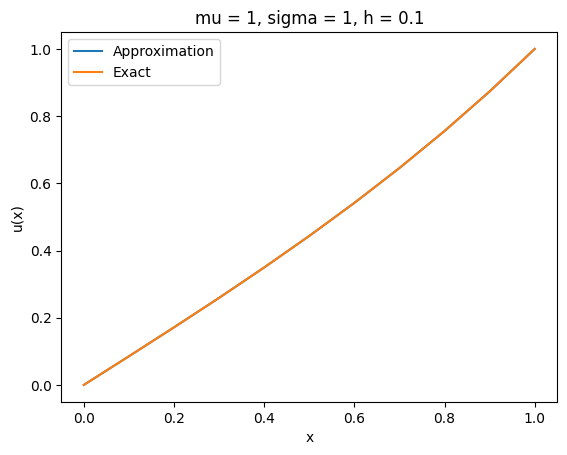

L^∞ error:	4.4145914650961515e-05
L error:	0.0001001058577180938
L^2 error:	3.165625175139224e-05


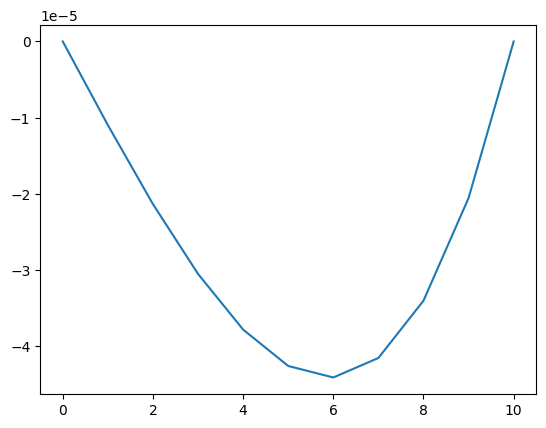

h = 0.05


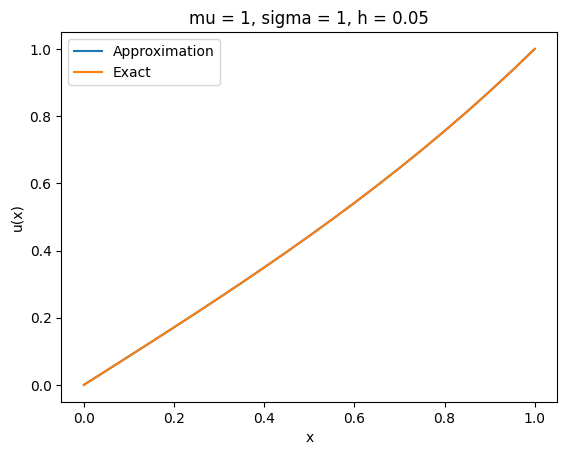

L^∞ error:	1.1046891147725724e-05
L error:	3.5428936468785744e-05
L^2 error:	7.922151031472628e-06


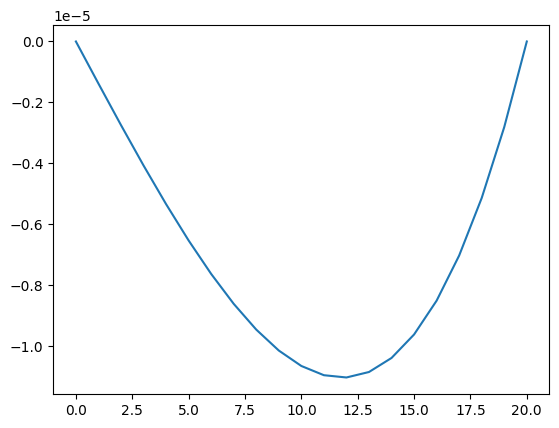

h = 0.025


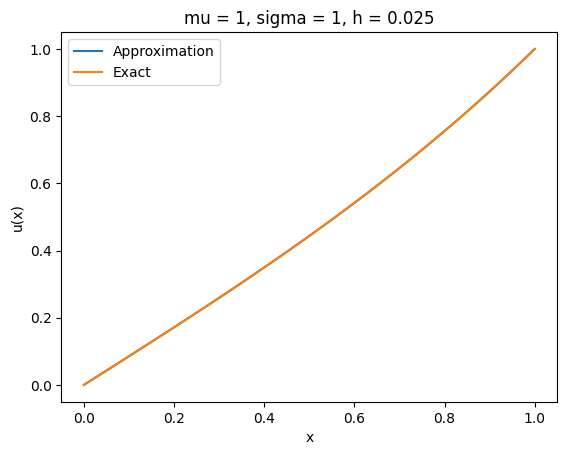

L^∞ error:	2.76237451046768e-06
L error:	1.2529036779999298e-05
L^2 error:	1.9810146556409876e-06


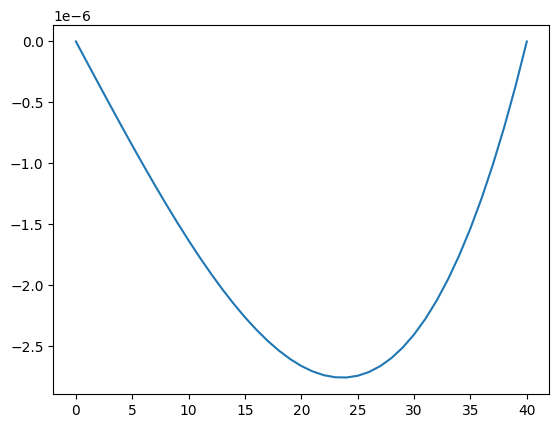

h = 0.0125


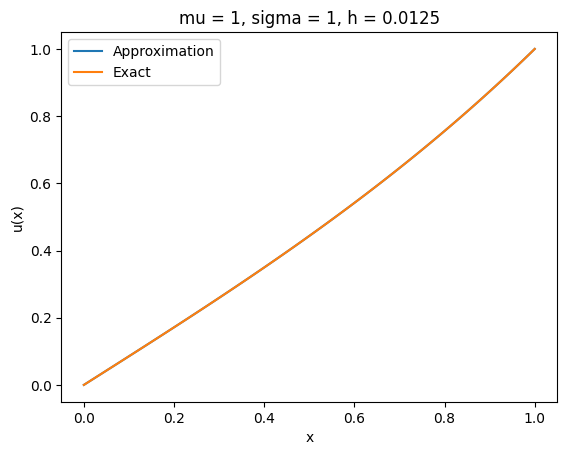

L^∞ error:	6.908963083862574e-07
L error:	4.429945994695048e-06
L^2 error:	4.952830190395524e-07


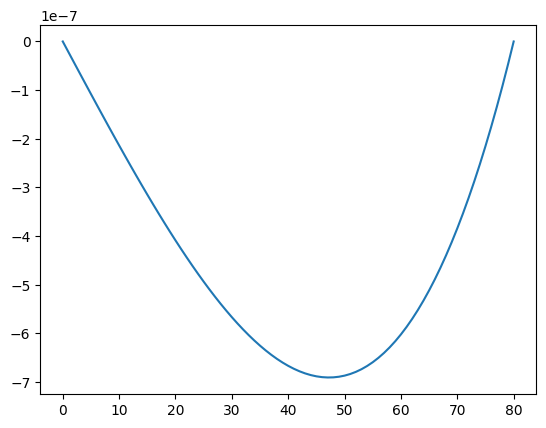

h = 0.00625


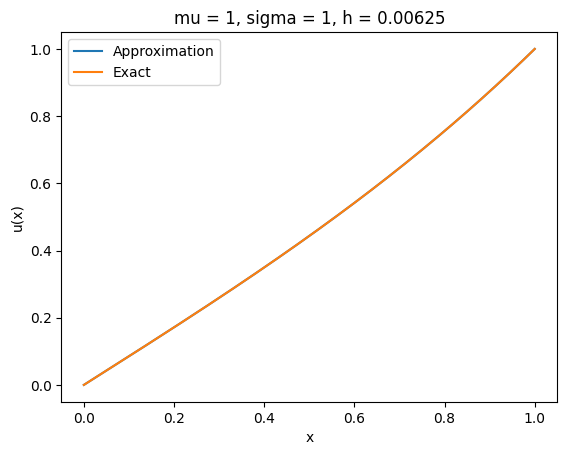

L^∞ error:	1.727266242257386e-07
L error:	1.5662455461718388e-06
L^2 error:	1.238225825249357e-07


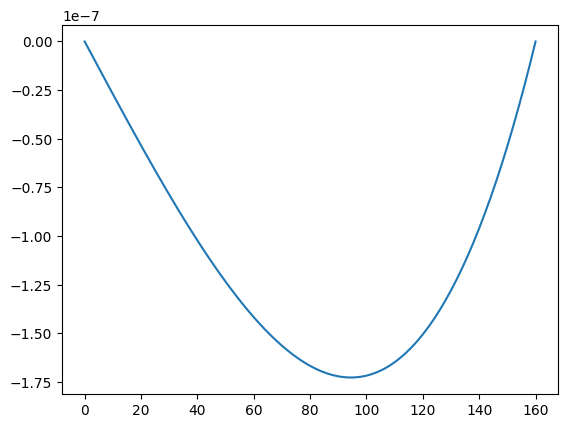

h = 0.003125


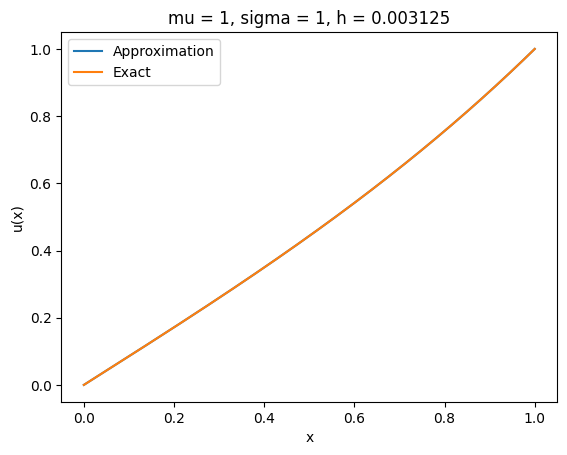

L^∞ error:	4.318346713549914e-08
L error:	5.53753502365021e-07
L^2 error:	3.0955761851669436e-08


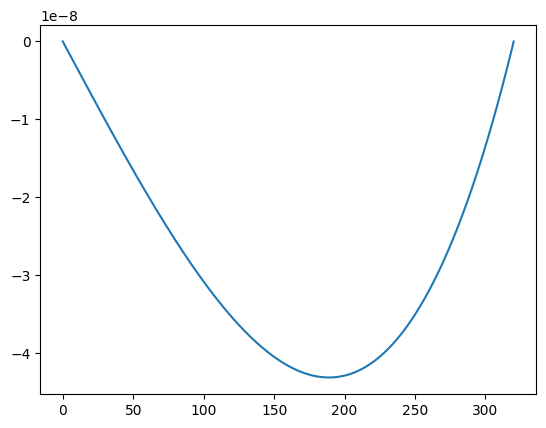

In [11]:
h = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125])
allerrinf = np.zeros(6)
allerrL2 = np.zeros(6)
i = 0

for step in h:
    print(f"h = {step}")
    mu = 1
    sigma = 1
    allerrinf[i], allerrL2[i] = main(mu, sigma, step)
    i+=1

In [12]:
print("L^\u221E error ratio:")
for i in range(allerrinf.shape[0]-1):
    print(allerrinf[i]/allerrinf[i+1])

print("\nL^2 error ratio:")
for i in range(allerrL2.shape[0]-1):
    print(allerrL2[i]/allerrL2[i+1])

L^∞ error ratio:
3.9962297139182046
3.9990562850420472
3.998247605230114
3.9999410136292384
3.9998322432926643

L^2 error ratio:
3.9959162133655686
3.9990370636149057
3.999762922384358
3.99994095535692
3.9999849823840785


This last code cell proves that it is $2^{\text{nd}}$ order accurate. As we learned in class to see order of a numerical method, we must look at how the $L^\infty, L^2$ error scales. For these to be second order, if we decrease $h$ by a factor of 2, the error should decrease by a factor of 4. We see this for both error types. The step sizes $h = [0.1, 0.05, 0.025,\cdots]$, decrease by a factor of 2, and the error at the $i^{\text{th}}$ step is 3.99999 times larger than the $(i+1)^{\text{th}}$ step. This is consistent over many values of $i$.

## Exercise 2

Consider the Advection - Diffusion problem:
$$
-\mu \frac{\text{d}^2u}{\text{d}x^2} + \beta \frac{\text{d}u}{\text{d}x} = 0, \quad x\in(0,1), u(0) = 0, u(1) = 1, \quad \mu > 0.
$$

Answer the following questions:

### Specify under what condition on $\Delta x$ the centered second order finite difference discretization $$-\mu \frac{u_{i+1}-2u_i +u_{i-1}}{\Delta x^2} + \beta \frac{u_{i+1} - u_{i-1}}{2\Delta x} =0 $$ does not produce oscillations. Sketch a proof of the condition you find.

The condition that causes the oscillations is when $\Delta x\ll 1$, and $\frac{|\beta|}{\mu}>>1$. This causes a boundary layer of width $\mathcal{O}(\frac{\mu}{\beta})$ when $x\to 1$. This is because the derivative behaves like $\frac{\beta}{\mu}$ which is unbounded as $\mu\to0$. This oscillation occurs because we are using a centered finite difference for the advection term. While it is second order, it is non-symmetric, which causes the instability. We would like to use a second order method for the advection, since the diffusion term is symmetric and second order, but we cannot use the centered finite difference. However, we could use the first order *upwind* solution. However, using $\frac{u_{i} - u_{i-1}}{h}$ or $\frac{u_{i-1} - u_{i}}{h}$ when $\beta>0, <0$, respectively, is only first order ($\mathcal{O}(h)$). However, we could observe that
$$
\frac{u_i - u_{i-1}}{h} = \frac{u_{i+1} - u_{i-1}}{2h} - \frac{h}{2} \frac{u_{i+1} -2u_i + u_{i-1}}{h^2}.
$$

We could consider this as the first order upwind scheme is the sum of the centered second order scheme and a term that is proportional to the discretization of the second derivative - a ''good guy'' as Prof. Veneziani would say. Sussinctly, this could be interpreted as an artificial diffusion term added to the centered difference. As was discussed in class, if we use $\mu_h := \mu(1+\mathbb{P}e)$, where $\mathbb{Pe}$ is the local Peclet number, then using the centered difference formualation, is equivalent to the upwind solution with just $\mu$. This can be thought of as a ''numerical viscosity''. 

Another way of getting higher order methods is to do a second order upwind scheme, which we will see below.

### Produce a **second order upwind method** (different from Sharfetter Gummel) depending on the sign of $\beta$.

First let $\beta>0$. To be an upwind scheme, this means that we can only look at points that are downstream to inform the future. For example, since we want to solve for $u_i = u_0 + ih$ (where $h := \Delta x$), the second order upwind scheme would use $u_{i-1}, u_{i-2}$. Taylor expanding these points, we get
$$
u_{i-1} = u_i - u_i'h + u''_i\frac{h^2}{2} + \mathcal{O}(h^3)\\
u_{i-2} = u_i - 2u_i'h + u''_i\frac{(2h)^2}{2} + \mathcal{O}(h^3)\\
$$

Using the method of undetermined coefficients, we aim to select $\alpha, \gamma$, such that $\alpha u_{i-1} + \gamma u_{i-2}$ let $u_i'$ have coefficient 1 and the $u''_i$ terms cancel. Namely this requires,

$$ -\alpha - 2\gamma = 1, \quad -\frac{\alpha}{2} - 2\gamma = 0.$$

Solving for these variables, we see $\alpha = -2, \gamma = \frac{1}{2}$. We then compute

$$ 
\alpha u_{i-1} + \gamma u_{i-2} = -2u_{i-1} + \frac{1}{2}u_{i-2}\\
= -2u_i + 2u_i'h + u''_ih^2 + \mathcal{O}(h^3) + \frac{1}{2}u_i - u_i'h + u''_i\frac{(2h)^2}{4} + \mathcal{O}(h^3)\\
= \frac{1}{2}u_{i-2} - 2u_{i-1} + \frac{3}{2}u_i\\
= u'_ih + \mathcal{O}(h^3).
$$

Rearranging, we arrive at
$$\frac{u_{i-2} - 4u_{i-1} + 3u_i}{2h} = u'_i + \mathcal{O}(h^2),$$

which is a second order accurate upwind scheme. 

Now let $\beta<0$. For this to be an upwind scheme, we would need to use $u_i, u_{i+1}, u_{i+2}$. Using the exact same process above of Taylor expanding, using the Method of undetermined coefficients, and adding these terms, it should be no suprise that we have
$$
\frac{-3u_i + 4u_{i+1} - u_{i+2}}{2h} = u_i' + \mathcal{O}(h^2),
$$
a second order upwind scheme, which is the exact opposite of what we discovered before.


### Implement your idea and verify your expectations for $|\beta| \gg \mu$.

In [18]:
def uExactAD(mu,beta,x):
    return (np.exp(beta*x/mu)-1)/(np.exp(beta/mu)-1)

def main2(mu, beta, h):
    ## Number of points
    N = int(1/h)
    
    ## Construct Upwind matrix 
    if beta >= 0:
        a1 = np.append(beta/(2*h) * np.ones(N-1),[0,0])
        a2 = np.append((-mu/(h**2) -2*beta/h)* np.ones(N),0)
        b = (2*mu/(h**2) + 1.5*beta/h) * np.ones(N+1)
        c = np.append(0,-mu/(h**2) * np.ones(N))
        d = boundaryConditions(np.zeros(N+1),0, 1./(h**2))

        ## Enforce boundary conditions
        a1[-3] = 0
        a2[-2] = 0
        b[0] = 1./(h**2)
        b[-1] = 1./(h**2)
        c[1] = 0

        ## Solve system
        u = sla.solve_banded((2,1), np.array([c,b,a2,a1]), d)
        u = boundaryConditions(u, 0, 1)
    else:
        a = np.append(-mu/(h**2) * np.ones(N),0)
        b = (2*mu/(h**2) - 1.5*beta/h) * np.ones(N+1)
        c1 = np.append(0,(-mu/(h**2)+2.*beta/h) * np.ones(N))
        c2 = np.append([0,0],-beta/(2*h) * np.ones(N-1))
        d = boundaryConditions(np.zeros(N+1),0, 1./(h**2))

        ## Enforce boundary conditions
        a[-2] = 0
        b[0] = 1./(h**2)
        b[-1] = 1./(h**2)
        c1[1] = 0
        c2[2] = 0

        ## Solve system
        u = sla.solve_banded((1,2), np.array([c2,c1,b,a]), d)
        #u = boundaryConditions(u, 0, 1)

    
    ## Plot and calculate error
    x = np.linspace(0,1,N+1)
    uEx = uExactAD(mu, beta, x)

    plt.plot(x, u, label='Approximation')
    plt.plot(x, uEx, label='Exact')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('mu = ' + str(mu) + ', beta = ' + str(beta) + ', h = ' + str(h))
    plt.legend()
    plt.show()

    err = uEx-u
    err_inf = np.max(np.abs(err))
    err_2 = np.sqrt(err.T.dot(err))
    err_l2 = np.sqrt(h*err.T.dot(err))

    print(f"L^\u221E error:\t{err_inf}")
    print(f"L error:\t{err_2}")
    print(f"L^2 error:\t{err_l2}")
    plt.plot(x,err)
    plt.show()

    return err_inf, err_l2

h = 0.1


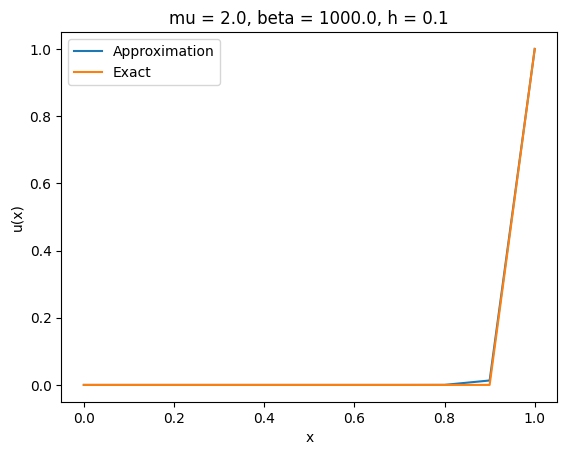

L^∞ error:	0.013215343853010954
L error:	0.013216498003121155
L^2 error:	0.004179423638093003


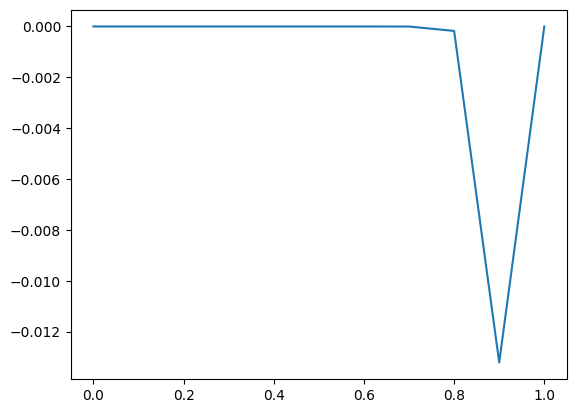

h = 0.05


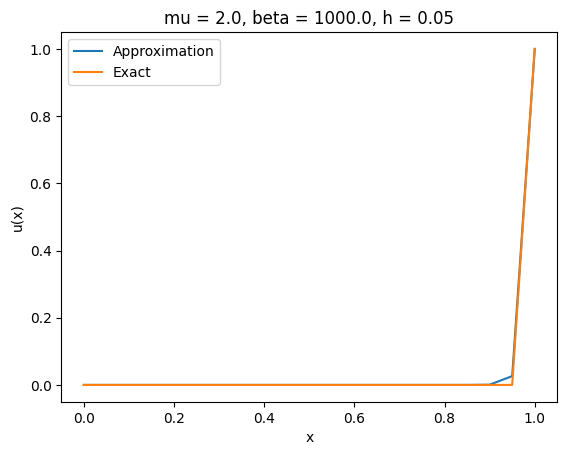

L^∞ error:	0.02619684237281126
L error:	0.026205836115337028
L^2 error:	0.0058598030961112615


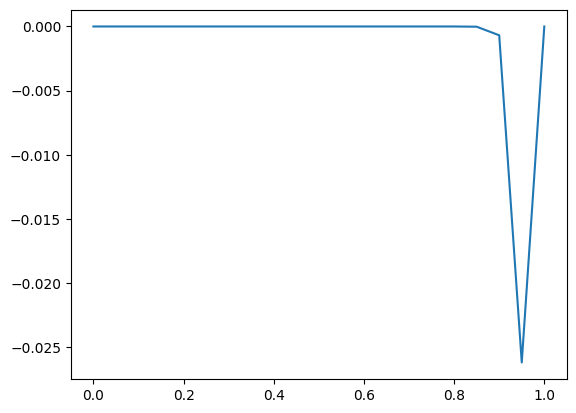

h = 0.025


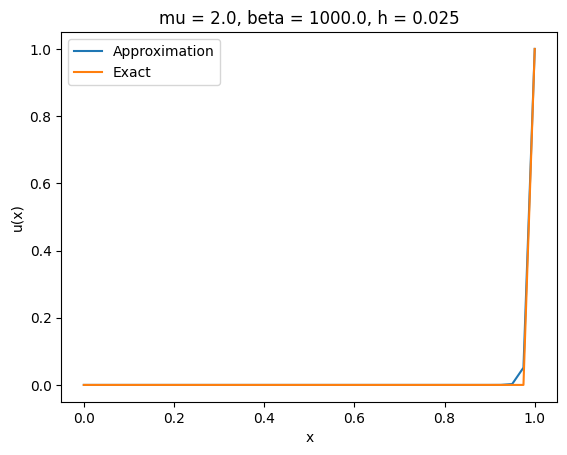

L^∞ error:	0.05146756900398829
L error:	0.05153589102194569
L^2 error:	0.00814853984377855


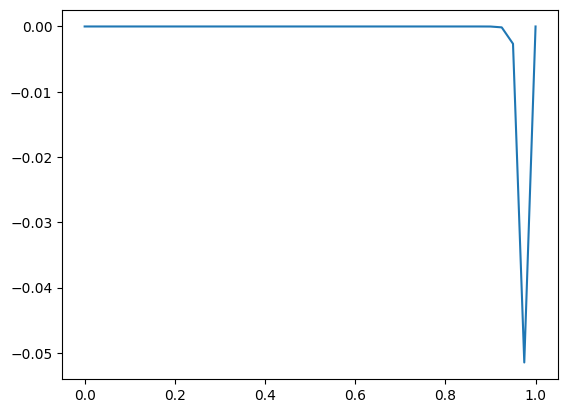

h = 0.0125


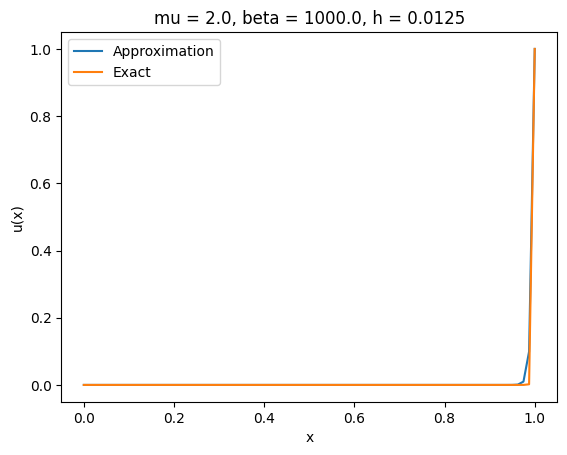

L^∞ error:	0.09742865187182001
L error:	0.097932126183182
L^2 error:	0.0109491445663341


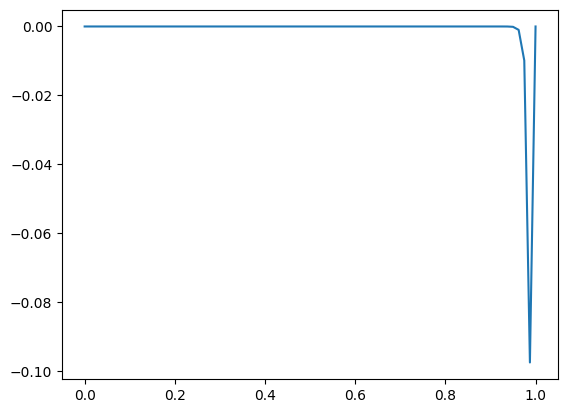

h = 0.00625


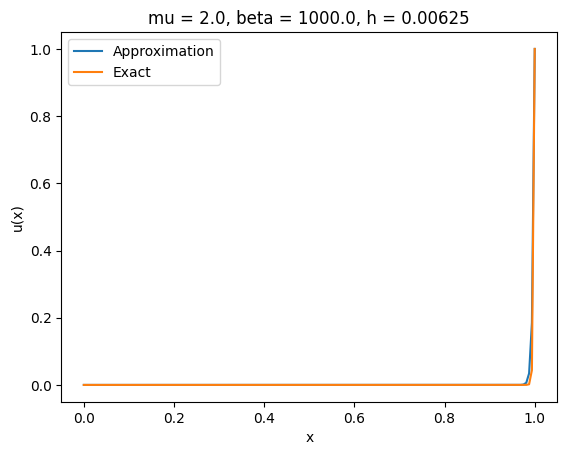

L^∞ error:	0.14131537942303707
L error:	0.14511992177526198
L^2 error:	0.011472737166882343


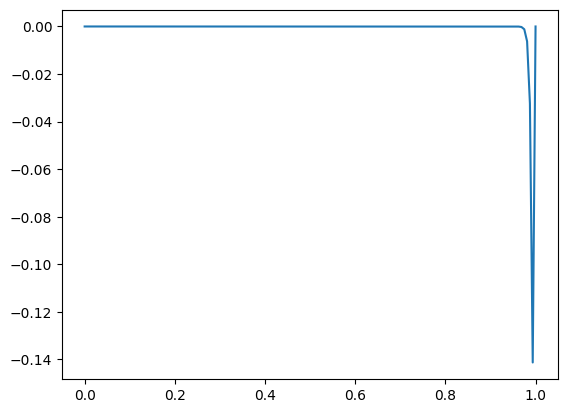

h = 0.003125


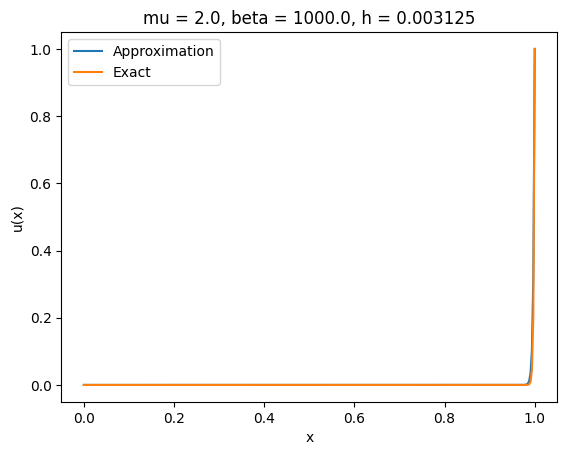

L^∞ error:	0.1139085001033639
L error:	0.13176995217955892
L^2 error:	0.007366164261634759


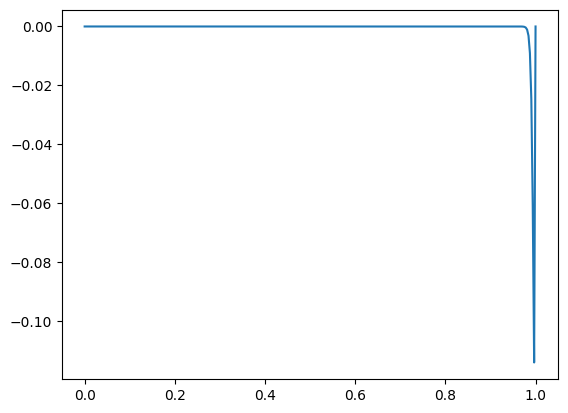

In [14]:
h = np.array([0.1,0.05, 0.025, 0.0125, 0.00625, 0.003125])
allerrinf = np.zeros(6)
allerrL2 = np.zeros(6)
i = 0

for step in h:
    print(f"h = {step}")
    mu = 2.
    beta = 1000.
    allerrinf[i], allerrL2[i] = main2(mu, beta, step)
    i+=1

In [15]:
print("L^\u221E error ratio:")
for i in range(allerrinf.shape[0]-1):
    print(allerrinf[i]/allerrinf[i+1])

print("\nL^2 error ratio:")
for i in range(allerrL2.shape[0]-1):
    print(allerrL2[i]/allerrL2[i+1])

L^∞ error ratio:
0.504463235108315
0.508997080681647
0.5282590697416252
0.689441250270155
1.2406043385243715

L^2 error ratio:
0.713236190626711
0.7191230832092267
0.7442170294137211
0.954362015538919
1.5574913563407586


h = 0.1


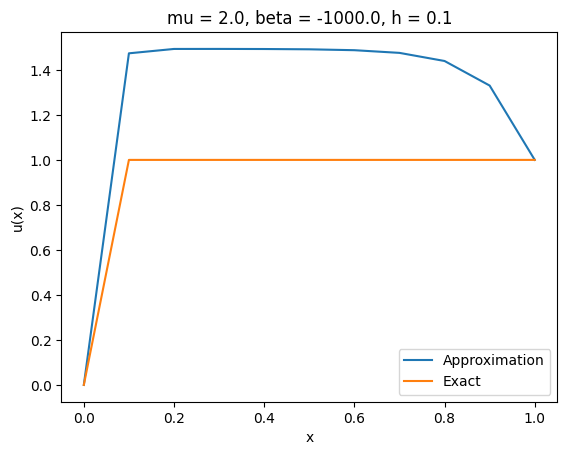

L^∞ error:	0.49317688824453065
L error:	1.4004280860408034
L^2 error:	0.44285424511591936


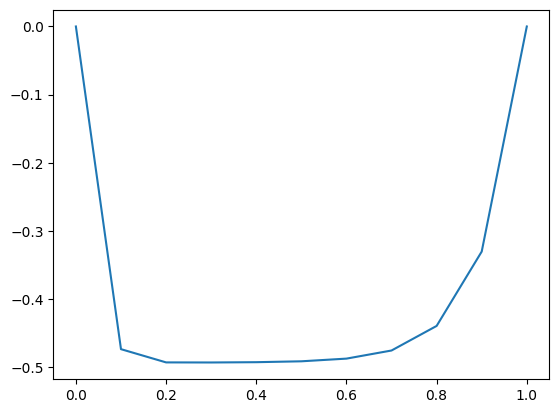

h = 0.05


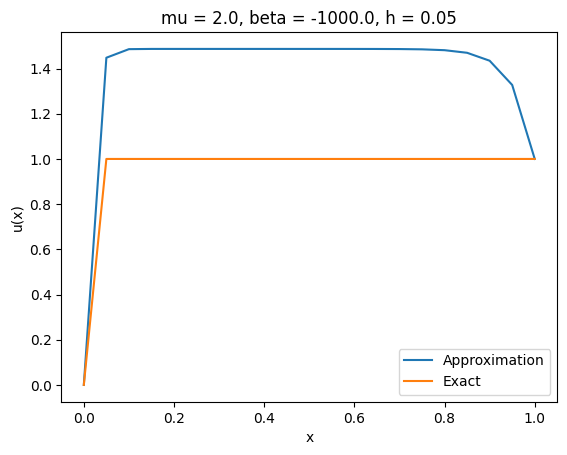

L^∞ error:	0.4869015344701022
L error:	2.065083102346904
L^2 error:	0.4617666196033833


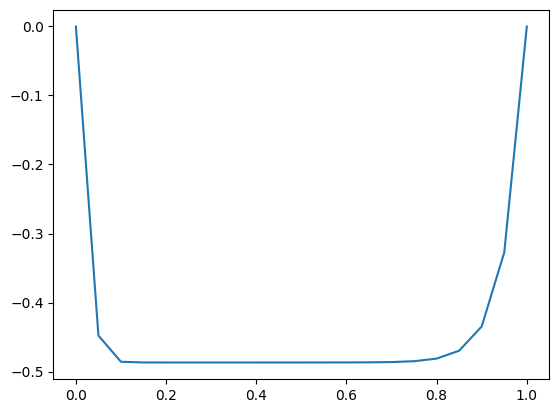

h = 0.025


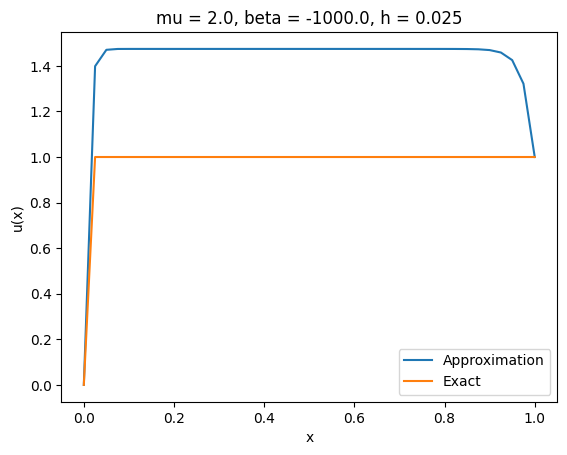

L^∞ error:	0.4742643521714123
L error:	2.9179871910966346
L^2 error:	0.4613742853531184


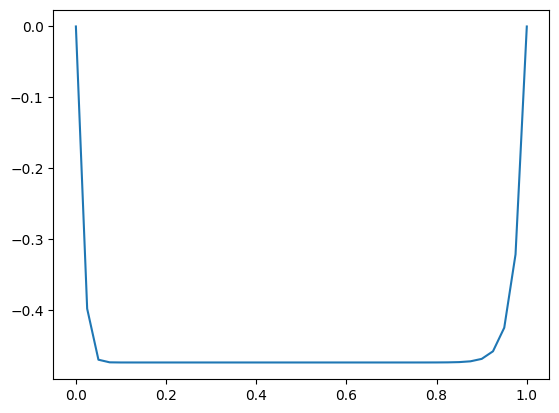

h = 0.0125


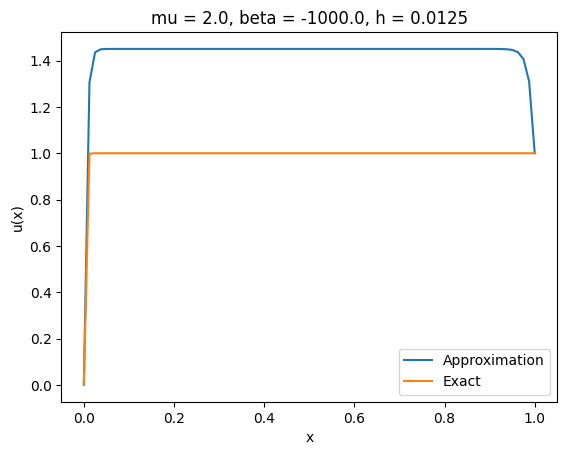

L^∞ error:	0.4503204469959754
L error:	3.967032651856031
L^2 error:	0.4435277339255671


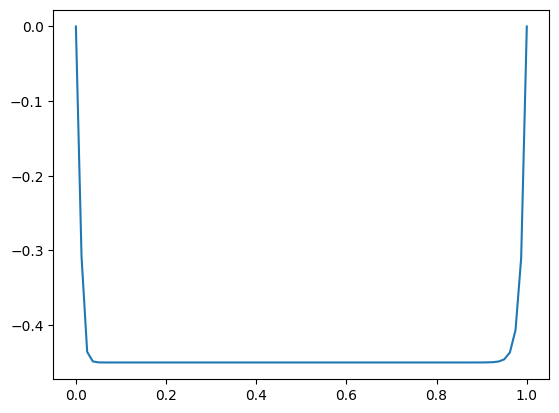

h = 0.00625


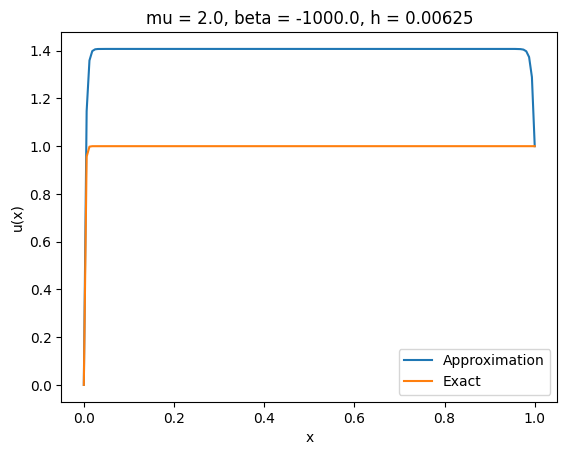

L^∞ error:	0.4073738434767671
L error:	5.108083145138017
L^2 error:	0.40382943040381464


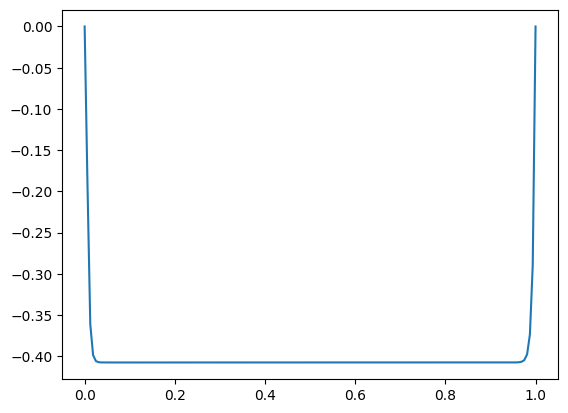

h = 0.003125


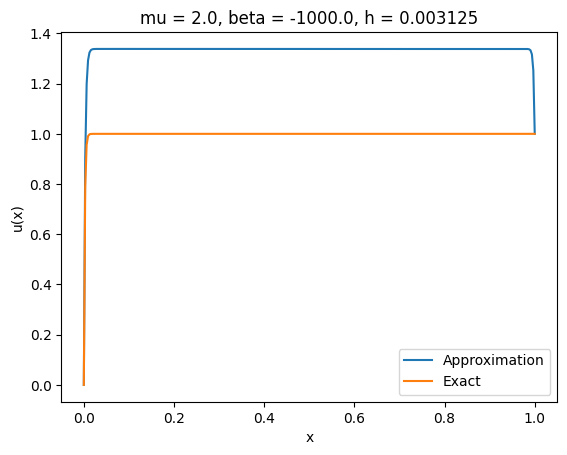

L^∞ error:	0.3382400563727548
L error:	6.019393410821919
L^2 error:	0.3364943212478032


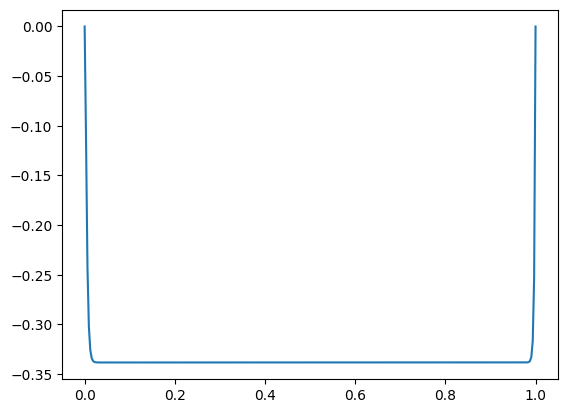

In [19]:
allerrinf = np.zeros(6)
allerrL2 = np.zeros(6)
i = 0

for step in h:
    print(f"h = {step}")
    mu = 2.
    beta = -1000.
    allerrinf[i], allerrL2[i] = main2(mu, beta, step)
    i+=1

In [17]:
print("L^\u221E error ratio:")
for i in range(allerrinf.shape[0]-1):
    print(allerrinf[i]/allerrinf[i+1])

print("\nL^2 error ratio:")
for i in range(allerrL2.shape[0]-1):
    print(allerrL2[i]/allerrL2[i+1])

L^∞ error ratio:
1.0128883425706554
1.0266458616188014
1.0531708149944408
1.1054230756512908
1.2043926666918006

L^2 error ratio:
0.9590434351800744
1.000850360028116
1.0402377350106056
1.098304631938429
1.20010771327824


While I did impliment my ideas, I did not verify my conclusions, I fear. When $\beta>0, \beta\gg\mu$, we seem to have an issue with the boundary conditions. There seems to be a point that is very close to the boundary layer that isn't working. In fact, we see that this issue is causing it to be $\mathcal{O}(h^{1/4})$, and only towards the very tight meshes, do we see close to an $\mathcal{O}(h)$ method. This could be how I coded it, using a banded solver to make sure that it was efficient. However, I could be messing up a boundary condition because of the weird format.

In the $\beta<0, |\beta|\gg\mu$ case, we see different phenomenon altogether. We see that our solution seems to be misscaled converging to a solution that is 1.4 times larger than what it should be, but we don't really see issues with the boundary conditons. Again this leads to $\mathcal{O}(h^{1/2})$ method. 

Since we are using an upwind method, I wonder if I should change how I take the derivative close to the upwind side. Since when $\beta>0$, we need to use $u_{i-1},u_{i-2}$; however, we cannot for the first two rows as we don't have a $u_{-1}$. The same logic applies if $\beta<0$ since we don't have a $u_{N+2}$ point.